### What is the problem?

The problem is to build a machine learning model that can automatically classify the operating load condition of a power system into one of three categories — Light Load, Medium Load, or Maximum Load — using historical energy consumption, reactive power, environmental, and time-based data.
This classification helps in understanding how the power system behaves under different demand conditions based on past observations.


### Why predicting Load_Type is important?

Predicting the Load_Type of a power system is important for efficient power planning, load balancing, and system reliability.
Accurate load prediction helps energy providers:

Optimize power generation and distribution

Prevent system overloads during peak demand

Reduce energy wastage during low demand periods

Improve decision-making for capacity planning and maintenance

### What type of ML problem is this?


This is a supervised machine learning classification problem, where the target variable (Load_Type) is already labeled.

the target variable contains three distinct categories — Light Load, Medium Load, and Maximum Load — this problem is classified as a multi-class classification problem.

### let's understand the data

In [1]:
#importing library for performing operation on data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df=pd.read_csv("D:/Raja/UseReady assignment/assignment-02 1/data/load_data.csv")

In [3]:
# Create a copy to avoid modifying original data
data = df.copy()

In [4]:
#how data is looking like
data.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [5]:
#what is size of data
data.shape

(35041, 9)

In [6]:
# To know the comprensive summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


### Date_Time column of data type is object-let's make it date time format

In [7]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d-%m-%Y')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date_Time                             35041 non-null  datetime64[ns]
 1   Usage_kWh                             33482 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64       
 4   CO2(tCO2)                             34586 non-null  float64       
 5   Lagging_Current_Power_Factor          34691 non-null  float64       
 6   Leading_Current_Power_Factor          33570 non-null  float64       
 7   NSM                                   34586 non-null  float64       
 8   Load_Type                             35041 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [9]:
#checking null values
data.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

#### I checked missing values, there are thousand null values so i can not remove simply, because it loss the data, so that it require data imputation method. And Method is median 

In [10]:
# Identify numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [11]:
num_cols

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')

In [12]:
# Fill missing values with median
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())


In [13]:
# Verify missing values are handled
data.isnull().sum()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

#### Encode Target Variable (Load_Type)
Why?
ML models require numeric targets

Load_Type is categorical


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Load_Type'] = label_encoder.fit_transform(data['Load_Type'])


In [15]:
data['Load_Type'].unique()

array([0, 2, 1])

## EDA & Visualization

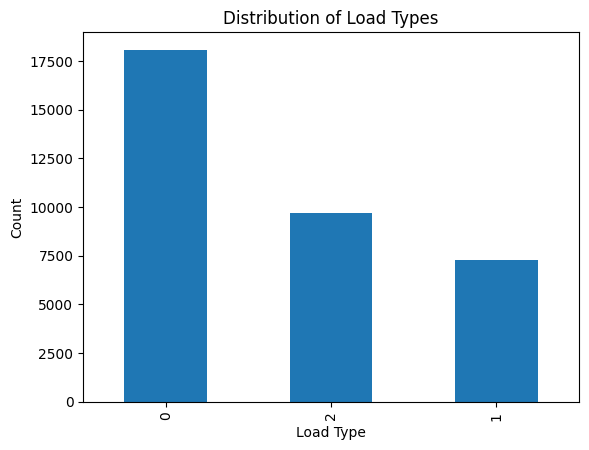

In [16]:
# Distribution of Load Types
data['Load_Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Load Types")
plt.xlabel("Load Type")
plt.ylabel("Count")
plt.show()

The dataset shows the distribution of Light, Medium, and Maximum load conditions. This helps identify class imbalance and its impact on model performance.

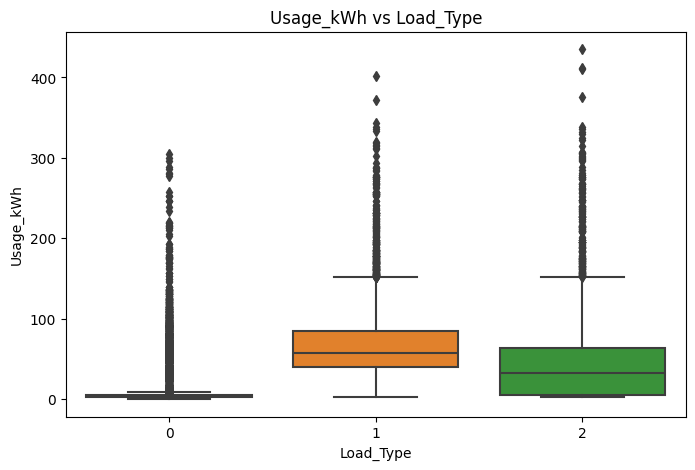

In [17]:
#Energy Usage vs Load Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Load_Type', y='Usage_kWh', data=data)
plt.title("Usage_kWh vs Load_Type")
plt.show()


Maximum load conditions have significantly higher energy consumption compared to Light and Medium loads.

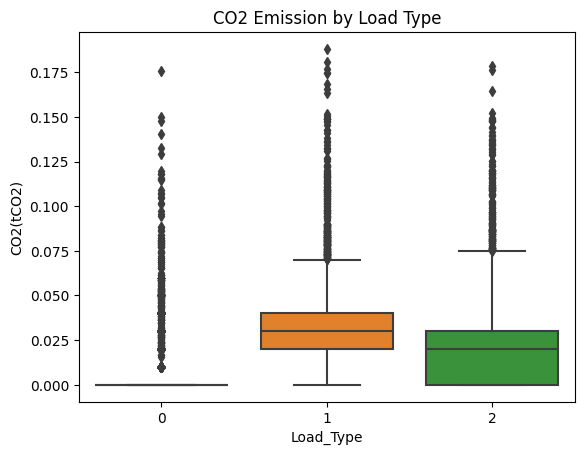

In [18]:
# CO2 Emission vs Load Type
sns.boxplot(x='Load_Type', y='CO2(tCO2)', data=data)
plt.title("CO2 Emission by Load Type")
plt.show()

Higher load conditions are associated with increased CO2 emissions, indicating environmental impact during peak demand.

In [19]:
# Time of Day Impact (NSM)
# Convert NSM → Hour
data['Hour'] = (data['NSM'] / 3600).astype(int)

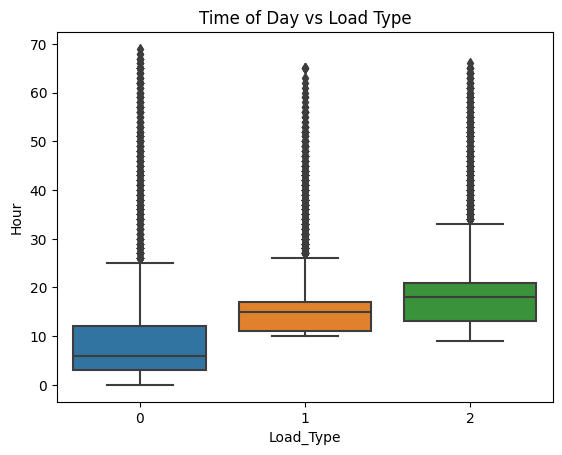

In [20]:
sns.boxplot(x='Load_Type', y='Hour', data=data)
plt.title("Time of Day vs Load Type")
plt.show()

Maximum loads mostly occur during specific daytime hours, showing time-dependent consumption behavior.

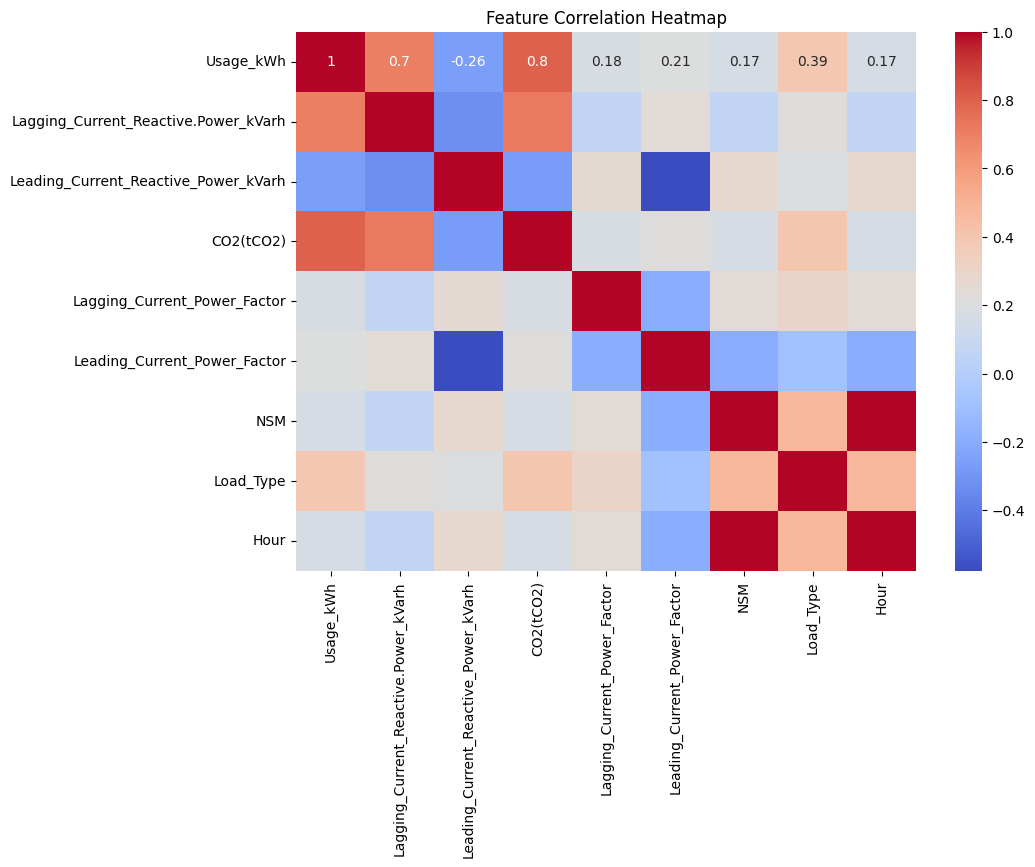

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Usage_kWh shows strong correlation with reactive power and CO2 emission, indicating their importance in predicting Load_Type.

In [22]:
# Extract month from date (seasonal behavior)
data['Month'] = data['Date_Time'].dt.month

# Convert NSM (seconds) into Hour of Day
data['Hour'] = (data['NSM'] / 3600).astype(int)

# Drop raw date column (not required for ML now)
data_model = data.drop(columns=['Date_Time'])

data_model.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Hour,Month
0,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,0,0,1
1,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,0,0,1
2,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,0,2,1
3,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,0,1,1
4,3.820000,4.50,0.0,0.0,133.655666,100.0,4500.000000,0,1,1


I created time-based features such as Month and Hour to capture seasonal and daily consumption patterns, which improves model learning and prediction accuracy.

## Model Building & Evaluation

In [23]:
# Separate features and target
X = data_model.drop(columns=['Load_Type'])
y = data_model['Load_Type']

In [24]:
# Time-Based Train-Test Split
# Sort by time
data_model_sorted = data_model.sort_values(by='Month')

# Use last month as test set
train_data = data_model_sorted[data_model_sorted['Month'] < data_model_sorted['Month'].max()]
test_data  = data_model_sorted[data_model_sorted['Month'] == data_model_sorted['Month'].max()]

X_train = train_data.drop(columns=['Load_Type'])
y_train = train_data['Load_Type']

X_test  = test_data.drop(columns=['Load_Type'])
y_test  = test_data['Load_Type']


I used time-based splitting instead of random splitting to respect the chronological nature of the data.

In [25]:
# importing logistic regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
# Scalling the data by StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1745
           1       0.32      0.29      0.30       528
           2       0.38      0.55      0.45       704

    accuracy                           0.64      2977
   macro avg       0.54      0.54      0.53      2977
weighted avg       0.69      0.64      0.65      2977



In [29]:
# Importing RandomForest Library 
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=150, random_state=50)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1745
           1       0.82      0.88      0.85       528
           2       0.82      0.95      0.88       704

    accuracy                           0.91      2977
   macro avg       0.87      0.91      0.89      2977
weighted avg       0.92      0.91      0.91      2977



## Confusion Matrix

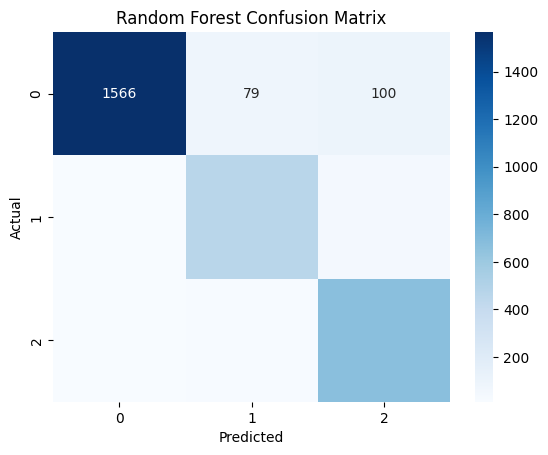

In [31]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

I trained a baseline Logistic Regression model and a Random Forest classifier. Random Forest performed better due to its ability to capture non-linear relationships in power consumption data.

In [32]:
from sklearn.ensemble import RandomForestClassifier


# Features & Target
X = data[['Usage_kWh',
          'Lagging_Current_Reactive.Power_kVarh',
          'Leading_Current_Reactive_Power_kVarh',
          'CO2(tCO2)',
          'Lagging_Current_Power_Factor',
          'Leading_Current_Power_Factor',
          'Month',
          'Hour']]

y = data['Load_Type']

# Train model
rf = RandomForestClassifier(n_estimators=150, random_state=50)
rf.fit(X, y)




RandomForestClassifier(n_estimators=150, random_state=50)

In [33]:
import pickle

In [34]:
# Save model
with open("load_type_model.pkl", "wb") as f:
    pickle.dump(rf, f)